In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://github.com/ipython-books/cookbook-data/raw/master/bikes.csv"

In [3]:
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)

In [4]:
df.head(2)

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0


In [5]:
df.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


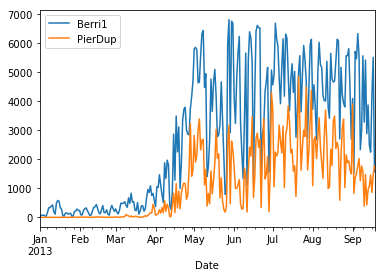

In [6]:
df[['Berri1', 'PierDup']].plot()

In [7]:
df.index.weekday

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            ...
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
           dtype='int64', name='Date', length=261)

In [10]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 'Tursday', 'Friday', 'Saturday', 'Sunday'])
df['Weekday'] = days[df.index.weekday]

In [11]:
df_week = df.groupby('weekday').sum()

In [12]:
df_week

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
weekday,,,,,,,,
Friday,105701,44252,71605,127526,64385,36850,118556,71426
Monday,106826,51646,68087,129982,69767,44500,119211,72883
Saturday,75754,27226,45947,79743,35544,46149,97143,56438
Sunday,74873,29181,40812,75746,37620,53812,100735,53798
Tuesday,117244,54656,76974,141217,74299,40679,123533,76559
Tursday,115193,52340,76273,141424,73668,36349,120684,74540
Wednesday,120434,59604,79033,145860,80437,42564,125173,79501


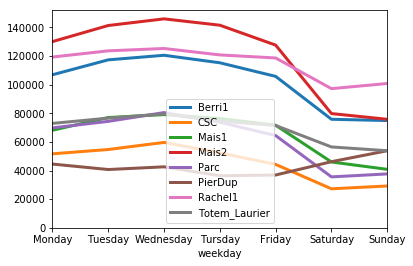

In [14]:
df_week.ix[days].plot(lw=3)
plt.ylim(0);

In [25]:
from ipywidgets import interact

@interact(n=(1, 30))
def plot(n):
    df['Berri1'].rolling(n).mean().plot()
    plt.ylim(0, 8000)
    plt.show()